<a href="https://colab.research.google.com/github/ferrry-ghsb/bigdata_6team/blob/main/%5Bksy%5DLSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#전처리 완료된 파일 불러오기
train = pd.read_csv('/content/drive/MyDrive/수업/빅데이터분석/데이터/gro_train.csv')
test = pd.read_csv('/content/drive/MyDrive/수업/빅데이터분석/데이터/gro_test.csv')

In [4]:
train

,Unnamed: 0,0,1,2
0,0,0.000000,0.000000,0.792965
1,1,0.292554,0.000000,0.792965
2,2,0.233977,0.000000,0.790951
3,3,0.226806,0.000000,0.792728
4,4,0.244457,0.000000,0.793675
...,...,...,...,...
1509,1509,0.335245,0.185629,0.319673
1510,1510,0.307998,0.173653,0.313159
1511,1511,0.149366,0.137725,0.313159
1512,1512,0.307998,0.161677,0.313159


In [18]:
len(train)

1514

In [26]:
train[6:7]

,Unnamed: 0,0,1,2
6,6,0.249531,0.0,0.793675


In [50]:
train= train.iloc[:, 1:4]

In [51]:
test= test.iloc[:, 1:4]

In [19]:
time_steps = 7
target = 1
train_len = len(train)
test_len = len(test)

In [75]:
X_train = []
Y_train = []
for i in range(time_steps, train_len-1):
  X_train.append(train[i-time_steps:i])
  Y_train.append(train.iloc[i, 0])

X_train, Y_train = np.array(X_train), np.array(Y_train)

In [76]:
X_test = []
Y_test = []
for i in range(time_steps, test_len-1):
  X_test.append(test[i-time_steps:i])
  Y_test.append(test.iloc[i, 0])

X_test, Y_test = np.array(X_test), np.array(Y_test)

In [77]:
X_train.shape, Y_train.shape

((1506, 7, 3), (1506,))

In [78]:
X_test.shape, Y_test.shape

((192, 7, 3), (192,))

In [79]:
from keras.layers import LSTM 
from keras.models import Sequential 
from keras.layers import Dense 
import keras.backend as K 
from keras.callbacks import EarlyStopping

In [80]:
K.clear_session()
model = Sequential() # Sequeatial Model 
model.add(LSTM(20, input_shape=(None, 3))) # (timestep, feature) 
model.add(Dense(1)) # output = 1 
model.compile(loss='mean_squared_error', optimizer='adam') 

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 20)                1920      
                                                                 
 dense (Dense)               (None, 1)                 21        
                                                                 
Total params: 1,941
Trainable params: 1,941
Non-trainable params: 0
_________________________________________________________________


In [81]:
history = model.fit(X_train, Y_train, epochs=100, validation_data=(X_test, Y_test))

Epoch 1/100
48/48 [==============================] - 3s 18ms/step - loss: 0.0192 - val_loss: 0.0097
Epoch 2/100
48/48 [==============================] - 0s 6ms/step - loss: 0.0065 - val_loss: 0.0084
Epoch 3/100
48/48 [==============================] - 0s 7ms/step - loss: 0.0062 - val_loss: 0.0080
Epoch 4/100
48/48 [==============================] - 0s 6ms/step - loss: 0.0062 - val_loss: 0.0079
Epoch 5/100
48/48 [==============================] - 0s 6ms/step - loss: 0.0062 - val_loss: 0.0080
Epoch 6/100
48/48 [==============================] - 0s 6ms/step - loss: 0.0062 - val_loss: 0.0081
Epoch 7/100
48/48 [==============================] - 0s 6ms/step - loss: 0.0062 - val_loss: 0.0080
Epoch 8/100
48/48 [==============================] - 0s 6ms/step - loss: 0.0061 - val_loss: 0.0080
Epoch 9/100
48/48 [==============================] - 0s 6ms/step - loss: 0.0061 - val_loss: 0.0079
Epoch 10/100
48/48 [==============================] - 0s 6ms/step - loss: 0.0061 - val_loss: 0.0079
Epoch 11

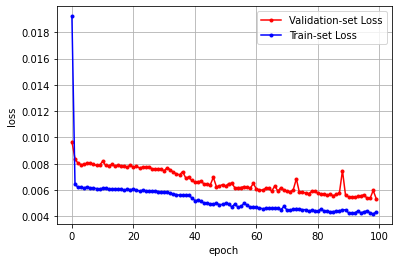

In [82]:
import matplotlib.pyplot as plt
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c='red', label="Validation-set Loss")
plt.plot(x_len, y_loss, marker='.', c='blue', label="Train-set Loss")

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [83]:
def plot_predict(a = 0):
    len_stor = range(1, 55)
    len_family = range(33)

    column_name = []
    for store in len_stor:
        for family in len_family:
            column_name+= [f"store : {store} family : {store_family.loc[store].iloc[family].name}"]
                
    plt.plot(scaler.transform(sales_data)[-77:,a])
    plt.plot(model.predict(X_valid)[:, a])
    plt.title(column_name[a])
    plt.legend(['True', 'Predict'])
    plt.show()

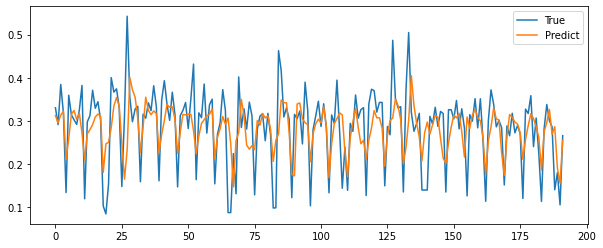

In [85]:
import matplotlib.pyplot as plt

plt.figure(figsize = (10, 4))
plt.plot(test.iloc[time_steps:-target, 0].values)
plt.plot(model.predict(X_test)[:])

plt.legend(['True', 'Predict'])
plt.show()

time step = 21일, 예측 1일

In [86]:
time_steps = 21
target = 1
train_len = len(train)
test_len = len(test)

In [87]:
X_train = []
Y_train = []
for i in range(time_steps, train_len-1):
  X_train.append(train[i-time_steps:i])
  Y_train.append(train.iloc[i, 0])

X_train, Y_train = np.array(X_train), np.array(Y_train)

In [88]:
X_test = []
Y_test = []
for i in range(time_steps, test_len-1):
  X_test.append(test[i-time_steps:i])
  Y_test.append(test.iloc[i, 0])

X_test, Y_test = np.array(X_test), np.array(Y_test)

In [89]:
X_train.shape, Y_train.shape

((1492, 21, 3), (1492,))

In [90]:
X_test.shape, Y_test.shape

((178, 21, 3), (178,))

In [96]:
K.clear_session()
model = Sequential() # Sequeatial Model 
model.add(LSTM(20, input_shape=(None, 3))) # (timestep, feature) 
model.add(Dense(1)) # output = 1 
model.compile(loss='mean_squared_error', optimizer='adam') 

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 20)                1920      
                                                                 
 dense (Dense)               (None, 1)                 21        
                                                                 
Total params: 1,941
Trainable params: 1,941
Non-trainable params: 0
_________________________________________________________________


In [97]:
history = model.fit(X_train, Y_train, epochs=100, validation_data=(X_test, Y_test))

Epoch 1/100
47/47 [==============================] - 3s 20ms/step - loss: 0.0165 - val_loss: 0.0103
Epoch 2/100
47/47 [==============================] - 0s 8ms/step - loss: 0.0066 - val_loss: 0.0084
Epoch 3/100
47/47 [==============================] - 0s 8ms/step - loss: 0.0064 - val_loss: 0.0083
Epoch 4/100
47/47 [==============================] - 0s 8ms/step - loss: 0.0063 - val_loss: 0.0082
Epoch 5/100
47/47 [==============================] - 0s 7ms/step - loss: 0.0063 - val_loss: 0.0085
Epoch 6/100
47/47 [==============================] - 0s 9ms/step - loss: 0.0063 - val_loss: 0.0083
Epoch 7/100
47/47 [==============================] - 0s 8ms/step - loss: 0.0063 - val_loss: 0.0082
Epoch 8/100
47/47 [==============================] - 0s 8ms/step - loss: 0.0063 - val_loss: 0.0082
Epoch 9/100
47/47 [==============================] - 0s 8ms/step - loss: 0.0063 - val_loss: 0.0082
Epoch 10/100
47/47 [==============================] - 0s 8ms/step - loss: 0.0063 - val_loss: 0.0081
Epoch 11

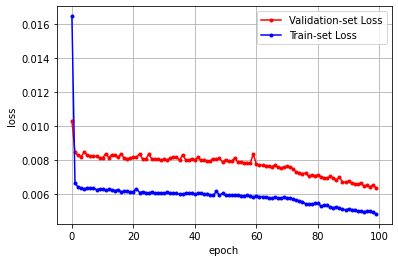

In [98]:
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c='red', label="Validation-set Loss")
plt.plot(x_len, y_loss, marker='.', c='blue', label="Train-set Loss")

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

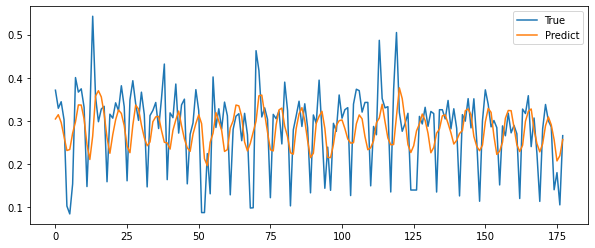

In [99]:
plt.figure(figsize = (10, 4))
plt.plot(test.iloc[time_steps:-target, 0].values)
plt.plot(model.predict(X_test)[:])

plt.legend(['True', 'Predict'])
plt.show()

7, 7

In [116]:
train.iloc[7:14, 0]

7     0.196580
8     0.267954
9     0.170325
10    0.193050
11    0.198125
12    0.106012
13    0.209818
Name: 0, dtype: float64

In [111]:
time_steps = 7
target = 7
train_len = len(train)
test_len = len(test)

In [121]:
X_train = []
Y_train = []
for i in range(time_steps, train_len-target):
  X_train.append(train[i-time_steps:i])
  Y_train.append(train.iloc[i:i+target, 0])

X_train, Y_train = np.array(X_train), np.array(Y_train)

In [122]:
X_test = []
Y_test = []
for i in range(time_steps, test_len-target):
  X_test.append(test[i-time_steps:i])
  Y_test.append(test.iloc[i:i+target, 0])

X_test, Y_test = np.array(X_test), np.array(Y_test)

In [123]:
X_train.shape, Y_train.shape

((1500, 7, 3), (1500, 7))

In [124]:
X_test.shape, Y_test.shape

((186, 7, 3), (186, 7))

In [130]:
K.clear_session()
model = Sequential() # Sequeatial Model 
model.add(LSTM(20, input_shape=(None, 3))) # (timestep, feature) 
model.add(Dense(7)) # output = 7
model.compile(loss='mean_squared_error', optimizer='adam') 

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 20)                1920      
                                                                 
 dense (Dense)               (None, 7)                 147       
                                                                 
Total params: 2,067
Trainable params: 2,067
Non-trainable params: 0
_________________________________________________________________


In [131]:
history = model.fit(X_train, Y_train, epochs=100, validation_data=(X_test, Y_test))

Epoch 1/100
47/47 [==============================] - 3s 19ms/step - loss: 0.0389 - val_loss: 0.0118
Epoch 2/100
47/47 [==============================] - 0s 6ms/step - loss: 0.0075 - val_loss: 0.0086
Epoch 3/100
47/47 [==============================] - 0s 7ms/step - loss: 0.0065 - val_loss: 0.0082
Epoch 4/100
47/47 [==============================] - 0s 6ms/step - loss: 0.0064 - val_loss: 0.0080
Epoch 5/100
47/47 [==============================] - 0s 6ms/step - loss: 0.0063 - val_loss: 0.0080
Epoch 6/100
47/47 [==============================] - 0s 7ms/step - loss: 0.0063 - val_loss: 0.0079
Epoch 7/100
47/47 [==============================] - 0s 6ms/step - loss: 0.0062 - val_loss: 0.0079
Epoch 8/100
47/47 [==============================] - 0s 7ms/step - loss: 0.0062 - val_loss: 0.0079
Epoch 9/100
47/47 [==============================] - 0s 6ms/step - loss: 0.0062 - val_loss: 0.0078
Epoch 10/100
47/47 [==============================] - 0s 6ms/step - loss: 0.0062 - val_loss: 0.0079
Epoch 11

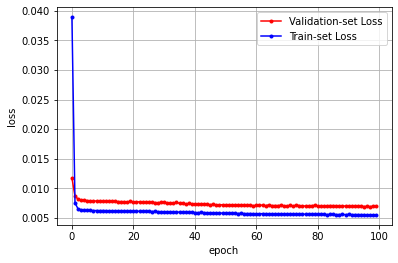

In [132]:
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c='red', label="Validation-set Loss")
plt.plot(x_len, y_loss, marker='.', c='blue', label="Train-set Loss")

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [149]:
X_test.shape

(186, 7, 3)

In [143]:
model.predict(X_test[:-1])

array([[0.30601227, 0.2985396 , 0.30069777, ..., 0.25374264, 0.24758828,
        0.29827103],
       [0.29347533, 0.27491033, 0.27852938, ..., 0.27153194, 0.27667373,
        0.31013608],
       [0.27990603, 0.26963112, 0.29238394, ..., 0.29191786, 0.29620555,
        0.2770564 ],
       ...,
       [0.26875877, 0.26628986, 0.29848787, ..., 0.30446112, 0.2886945 ,
        0.28186136],
       [0.24933921, 0.26191396, 0.29956728, ..., 0.3009553 , 0.28830338,
        0.24218567],
       [0.25730026, 0.27410123, 0.31021166, ..., 0.2697369 , 0.2564616 ,
        0.19150986]], dtype=float32)

In [179]:
import torch

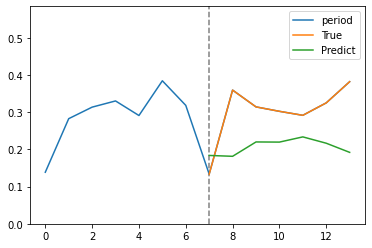

In [193]:
i = 4
plt.plot(np.arange(time_steps + target), test.iloc[i:time_steps + target+i, 0].values)
plt.plot(np.arange(time_steps, time_steps + target), test.iloc[i+time_steps:time_steps + target+i, 0].values)
plt.plot(np.arange(time_steps, time_steps + target) , model.predict(np.expand_dims(X_train[i], axis = 0)).squeeze())
plt.vlines(7, 0, 1, color = 'gray', linestyle = '--')
plt.ylim(0,test.iloc[:time_steps + target, 0].values.max() + 0.2)
plt.legend(['period', 'True', 'Predict'])
plt.show()

14, 1

In [196]:
time_steps = 14
target = 1
train_len = len(train)
test_len = len(test)

In [197]:
X_train = []
Y_train = []
for i in range(time_steps, train_len-target):
  X_train.append(train[i-time_steps:i])
  Y_train.append(train.iloc[i:i+target, 0])

X_train, Y_train = np.array(X_train), np.array(Y_train)

In [198]:
X_test = []
Y_test = []
for i in range(time_steps, test_len-target):
  X_test.append(test[i-time_steps:i])
  Y_test.append(test.iloc[i:i+target, 0])

X_test, Y_test = np.array(X_test), np.array(Y_test)

In [199]:
K.clear_session()
model = Sequential() # Sequeatial Model 
model.add(LSTM(20, input_shape=(None, 3))) # (timestep, feature) 
model.add(Dense(1)) # output = 1
model.compile(loss='mean_squared_error', optimizer='adam') 

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 20)                1920      
                                                                 
 dense (Dense)               (None, 1)                 21        
                                                                 
Total params: 1,941
Trainable params: 1,941
Non-trainable params: 0
_________________________________________________________________


In [200]:
history = model.fit(X_train, Y_train, epochs=100, validation_data=(X_test, Y_test))

Epoch 1/100
47/47 [==============================] - 3s 19ms/step - loss: 0.0236 - val_loss: 0.0086
Epoch 2/100
47/47 [==============================] - 0s 7ms/step - loss: 0.0064 - val_loss: 0.0084
Epoch 3/100
47/47 [==============================] - 0s 7ms/step - loss: 0.0063 - val_loss: 0.0083
Epoch 4/100
47/47 [==============================] - 0s 7ms/step - loss: 0.0062 - val_loss: 0.0083
Epoch 5/100
47/47 [==============================] - 0s 7ms/step - loss: 0.0061 - val_loss: 0.0083
Epoch 6/100
47/47 [==============================] - 0s 7ms/step - loss: 0.0062 - val_loss: 0.0082
Epoch 7/100
47/47 [==============================] - 0s 7ms/step - loss: 0.0061 - val_loss: 0.0081
Epoch 8/100
47/47 [==============================] - 0s 7ms/step - loss: 0.0062 - val_loss: 0.0082
Epoch 9/100
47/47 [==============================] - 0s 7ms/step - loss: 0.0061 - val_loss: 0.0082
Epoch 10/100
47/47 [==============================] - 0s 7ms/step - loss: 0.0061 - val_loss: 0.0082
Epoch 11

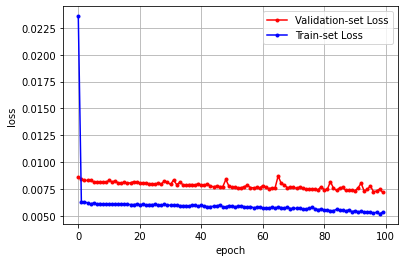

In [201]:
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c='red', label="Validation-set Loss")
plt.plot(x_len, y_loss, marker='.', c='blue', label="Train-set Loss")

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

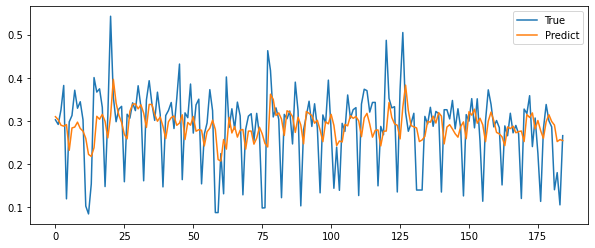

In [202]:
plt.figure(figsize = (10, 4))
plt.plot(test.iloc[time_steps:-target, 0].values)
plt.plot(model.predict(X_test)[:])

plt.legend(['True', 'Predict'])
plt.show()